# ***EXPLORATORY DATA ANALYSIS ON IMDB DATASET***

In this project I will be doing analysis of IMDB dataset obtained from kagggle. Few of the business questions that I am going to explore are as below.




1. What are the top rated movies?
2. Which genre of the movies is mostly liked by the audience?
3. Which movies have the highest gross?
4. Do the movies with highest IMDB rating earn highest gross always?
5. What is the trend analysis of the movie genre preferences by the audience?
6. Who are the top rated direnctors and actors?
7. What runtime is good to get a good IMDB rating and gross?
8. For a movie to be sucessful, design a plan which should include Genre, director, actors and runtime of the movie. 



---



**The first thing I am doing here is to import the dataset (downloaded from kaggle)**

---



In [2]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

Saving imdb_top_1000.csv to imdb_top_1000.csv




---


# ***The dataset contains the following columns. ***

1. Poster Link - Link of the movie posters.
2. Series_Title - Name of the movie.
3. Certificate of the movie.
4. Runtime - Time of the movie in minutes.
5. Genre - Genre of the movie.
6. IMDB_Rating.
7. Overview - A short overview of the movie in few sentences.
8. Meta score
9. Director name
10. Names of the actors (4 maximum)
11. Gross
12. No of votes


---



---




In [234]:
imdb_df = pd.read_csv(r'imdb_top_1000.csv')


**As we dont need the poster link and overview of the movie to do the analysis, the next cel drops these columns from the dataset**






---



---



In [235]:
imdb_df.drop(columns = ['Poster_Link', 'Overview'], axis = 1, inplace = True)
imdb_df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"





---


Next, I am Checking for null entries in the data. As it can be seen from the result there are few null entries in colums **'Certificate', 'Gross' and 'Meta score'**, I am using pandas fillna() method to replace the NaN values with the mean of the respective columns. The below cells contains the code for the same 




---



---



In [236]:
imdb_df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [237]:
imdb_df['Gross'].fillna(imdb_df['Gross'].mode()[0], inplace=True)


In [238]:
imdb_df['Meta_score'].fillna(imdb_df['Meta_score'].mode()[0], inplace=True)

# After cleaning the dataset, it is now ready for the exploratory data analysis. In the next parts of the code , I will be exploring the business questions mentioned above. 

 ***1.What are the top rated movies?***


To check the movies with highest rating, I am groping the movies with rating greater than 8 and theri genre. 

Few of the classic high rated movies are as below. 




---



---



In [239]:
topMovies = imdb_df[imdb_df['IMDB_Rating']>8.5].sort_values(['IMDB_Rating'], ascending=False)
topMovies.drop(['Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Released_Year',	'Certificate',	'Runtime'], axis=1, inplace=True)
topMovies = topMovies[0:10]

In [240]:
topMovies

,Series_Title,Genre,IMDB_Rating
0,The Shawshank Redemption,Drama,9.3
1,The Godfather,"Crime, Drama",9.2
2,The Dark Knight,"Action, Crime, Drama",9.0
3,The Godfather: Part II,"Crime, Drama",9.0
4,12 Angry Men,"Crime, Drama",9.0
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",8.9
6,Pulp Fiction,"Crime, Drama",8.9
7,Schindler's List,"Biography, Drama, History",8.9
8,Inception,"Action, Adventure, Sci-Fi",8.8
9,Fight Club,Drama,8.8


***2. Which genre of the movies is mostly liked by the audience?***



Here, the genre from top rated movies is selected. The movies range from the year 1920 to the year 2020. The below pie chart shows the all time favourite genre by the audience. The most watched genre is Crime-Drama. In the further parts we will also be doing a trend analysis of the genre to get a clear picture of the latest genre loved by the audience. 





---



---



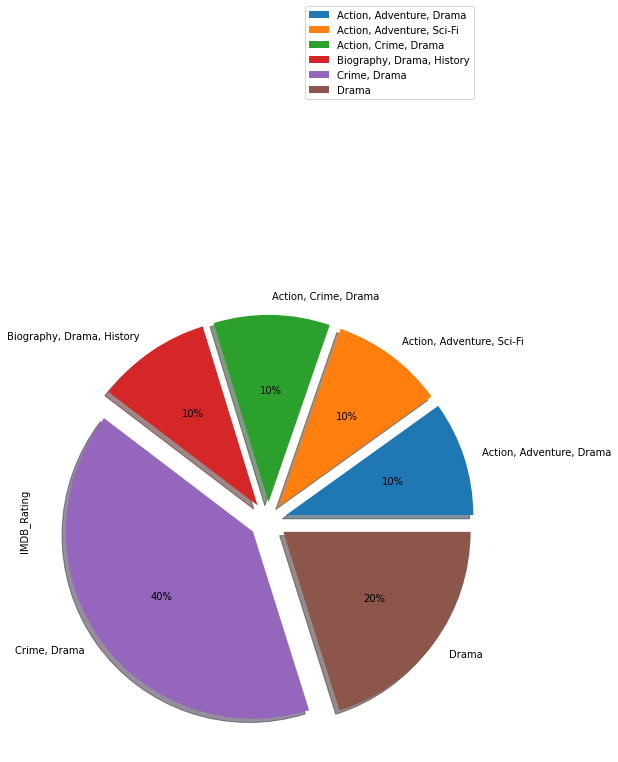

In [241]:
import matplotlib.pyplot as plt
import matplotlib.patches
explode = (0.1,0.1,0.10,0.1,0.10,0.10)
topMovies.groupby(['Genre']).sum().plot(
    kind='pie', y='IMDB_Rating', autopct='%1.0f%%', shadow=True, figsize=(10, 10), explode=explode)
plt.legend( bbox_to_anchor=(0.95,1.5), loc="center right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)









***2. Movies with highest Meta score and their IMDB rating.*** 



From the dataset we can see that the highest meta score of the movies is 100. Even tough few movies have high meta score, theri rating less as compared to the movies with less meta score and high rating. This suggests that Meta score is not a reliable factor to decide the sucess of the movies. 




---



---



In [242]:
Highest_metaScore = imdb_df[imdb_df['Meta_score']==100].sort_values(['Meta_score'], ascending=False)
Highest_metaScore.drop(['Released_Year', 'Certificate', 'Runtime', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'], axis =1, inplace=True)
Highest_metaScore 

,Series_Title,Genre,IMDB_Rating,Meta_score
1,The Godfather,"Crime, Drama",9.2,100.0
50,Casablanca,"Drama, Romance, War",8.5,100.0
81,Rear Window,"Mystery, Thriller",8.4,100.0
116,Lawrence of Arabia,"Adventure, Biography, Drama",8.3,100.0
119,Vertigo,"Mystery, Romance, Thriller",8.3,100.0
124,Citizen Kane,"Drama, Mystery",8.3,100.0
260,Trois couleurs: Rouge,"Drama, Mystery, Romance",8.1,100.0
274,Fanny och Alexander,Drama,8.1,100.0
423,Il conformista,Drama,8.0,100.0
440,Sweet Smell of Success,"Drama, Film-Noir",8.0,100.0


Text(0.5, 1.0, 'Movies with hightest Meta Score and their IMDB ratings')

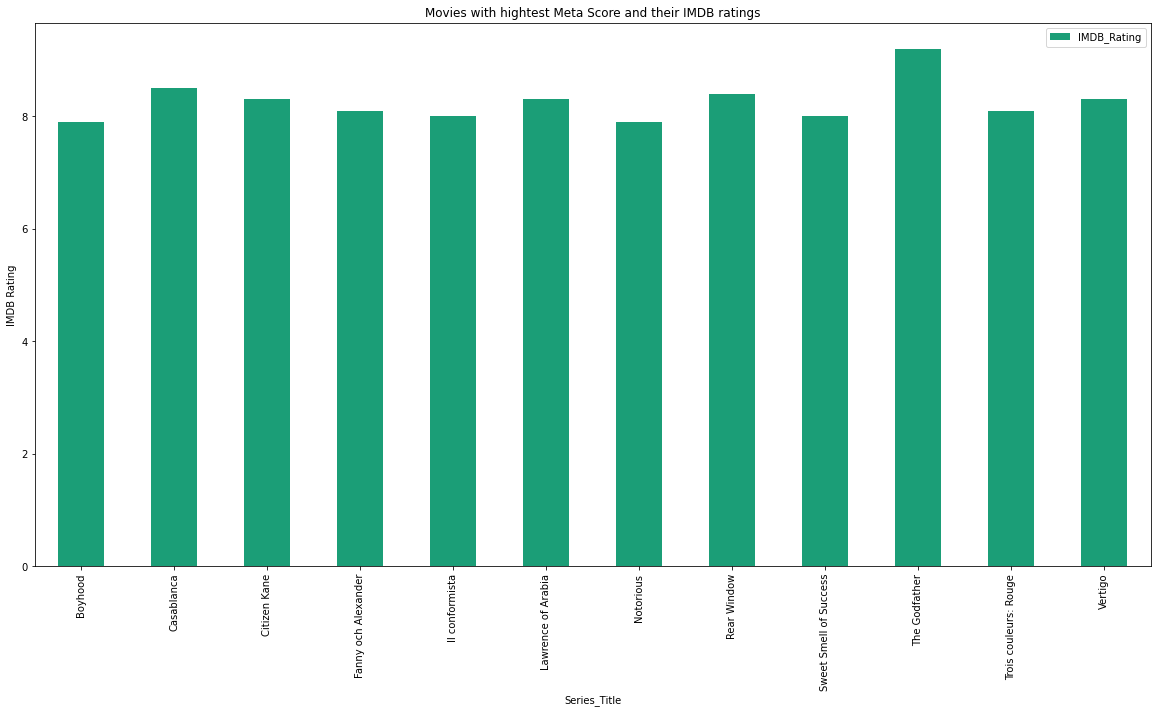

In [243]:
Highest_metaScore.groupby(['Series_Title']).sum().plot(
    kind='bar', y='IMDB_Rating', figsize=(20, 10), cmap='Dark2')
plt.ylabel('IMDB Rating')
plt.title('Movies with hightest Meta Score and their IMDB ratings')

# ***4. Average time duration of the movies***


Next, I am going to check what is the average runtime of the movies from the year 1920 to the year 2020. In the next part, I will also be exploring the runtime of the movies accoring to theri rating. 

As we can see from the histogram below, the average runtime of the movies is between 100 mins - 150 mins. 





---



---



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

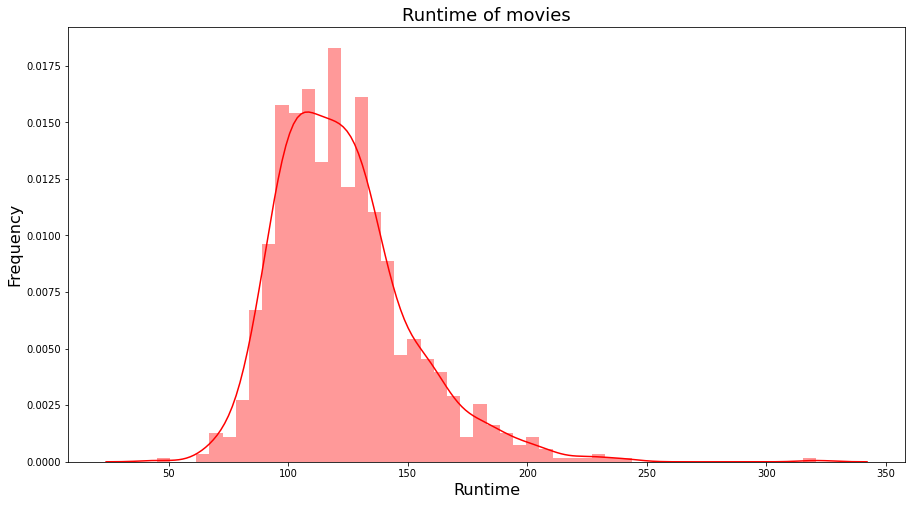

In [244]:
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(imdb_df['Runtime'], kde=True, color='red', bins=50)
plt.title('Runtime of movies', fontsize=18)
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [245]:
import matplotlib
imdb_df.hist(column='Runtime', by='IMDB_Rating',figsize=(200, 150))
plt.xlabel('Runtime and rating')


Text(0.5, 0, 'Runtime and rating')

# ***5. Certificates of the top rated Movies***

Next, I will be exlpoing the top rated movies and their certificates. As it can be seen from the below pie chart, most of the top rated movies are "A" certified or "U" certified





---



---



In [246]:
Cert = imdb_df[imdb_df['IMDB_Rating']>8].sort_values(['IMDB_Rating'], ascending=False)
Cert.drop(['Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Released_Year',	'Runtime'], axis=1, inplace=True)

In [247]:
Cert[0:20]

,Series_Title,Certificate,Genre,IMDB_Rating
0,The Shawshank Redemption,A,Drama,9.3
1,The Godfather,A,"Crime, Drama",9.2
2,The Dark Knight,UA,"Action, Crime, Drama",9.0
3,The Godfather: Part II,A,"Crime, Drama",9.0
4,12 Angry Men,U,"Crime, Drama",9.0
5,The Lord of the Rings: The Return of the King,U,"Action, Adventure, Drama",8.9
6,Pulp Fiction,A,"Crime, Drama",8.9
7,Schindler's List,A,"Biography, Drama, History",8.9
10,The Lord of the Rings: The Fellowship of the Ring,U,"Action, Adventure, Drama",8.8
11,Forrest Gump,UA,"Drama, Romance",8.8


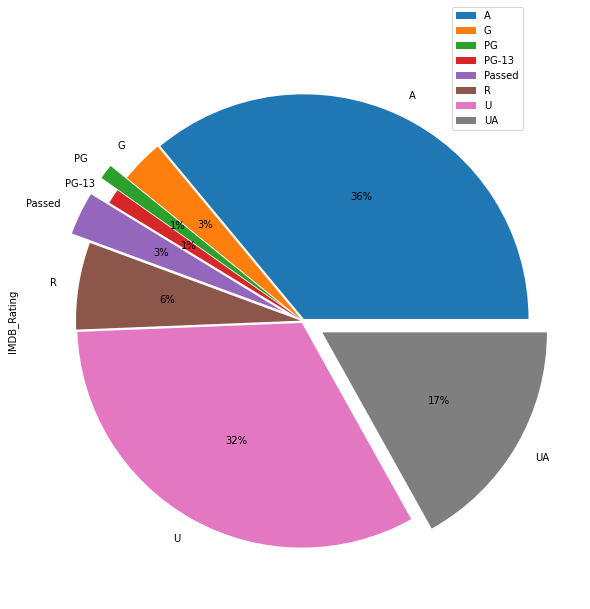

In [248]:
explode = (0.01,0.01,0.1,0.01,0.1,0.01, 0.01, 0.1)
Cert[0:100].groupby(['Certificate']).sum().plot(
    kind='pie', y='IMDB_Rating', autopct='%1.0f%%', shadow=False, figsize=(20, 10), explode=explode)
plt.legend( bbox_to_anchor=(0.90,0.95), loc="center right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.50)

In [249]:
import numpy as np
imdb_df['Gross'] = imdb_df['Gross'].str.replace(',', '').astype(float)

# ***6. Which are the highest grossing movies***

In this part, I will be exploring which movies have the highest gross, what is theri genre etc. This will enable us to know, which kind of movie will be sucessful in terms of profit. 




---



---



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

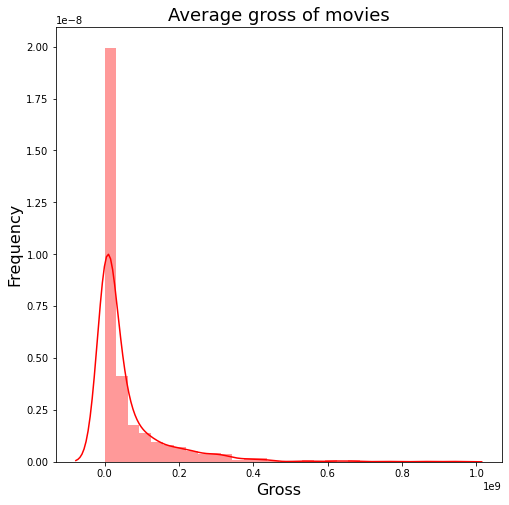

In [250]:
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.distplot(imdb_df['Gross'], kde=True, color='red', bins=30)
plt.title('Average gross of movies', fontsize=18)
plt.xlabel('Gross', fontsize=16)
plt.ylabel('Frequency', fontsize=16)


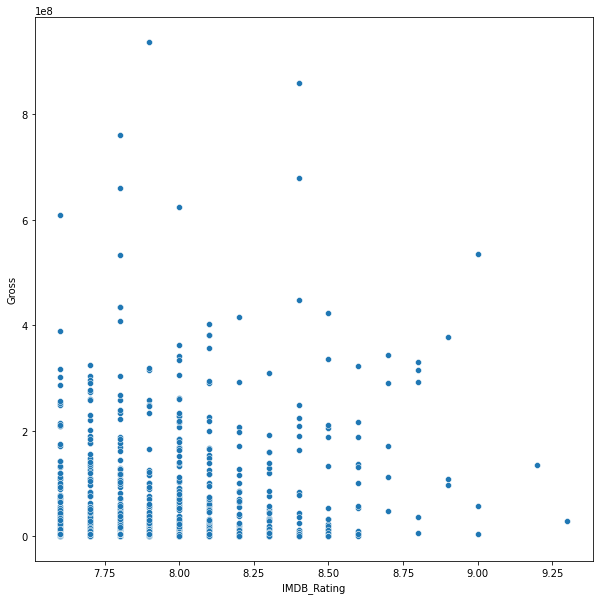

In [251]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = imdb_df, x = "IMDB_Rating", y = "Gross")

plt.show()

We can see from the above figures that movies with ratings greater than 8 have the closer averege gross, and only a few movies have made exceptional gross. In the next section I am analyzing the movies with highest gross. 





---



---



In [252]:
#Highest_gross = imdb_df.groupby('Genre')['Series_Title'	,'IMDB_Rating',	'Gross']
highest_gross = imdb_df.sort_values('Gross', ascending= False).reset_index(drop=True).loc[:10]

In [253]:
highest_gross

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
1,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
2,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
3,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
4,Titanic,1997,UA,194,"Drama, Romance",7.8,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0
5,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.0,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0
6,Incredibles 2,2018,UA,118,"Animation, Action, Adventure",7.6,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0
7,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
8,Rogue One,2016,UA,133,"Action, Adventure, Sci-Fi",7.8,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0
9,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0


From the above result, it is clear that even tough some of the movies do not have the best IMDB score, they have still managed to generate maximum gross. Movies like Star Wars,  Avatar, Titanic, Incredibles are among the top gross generating movies. In the next part, I am exploring the genre of the movies wih highest gross and as it can be seen from the pie chart, the genre **'Action, Adventure,Sci-Fi' generates more gross as compred to the genre 'Crime, Drama' which is among the highest IMDB Rating movies.**





---



---



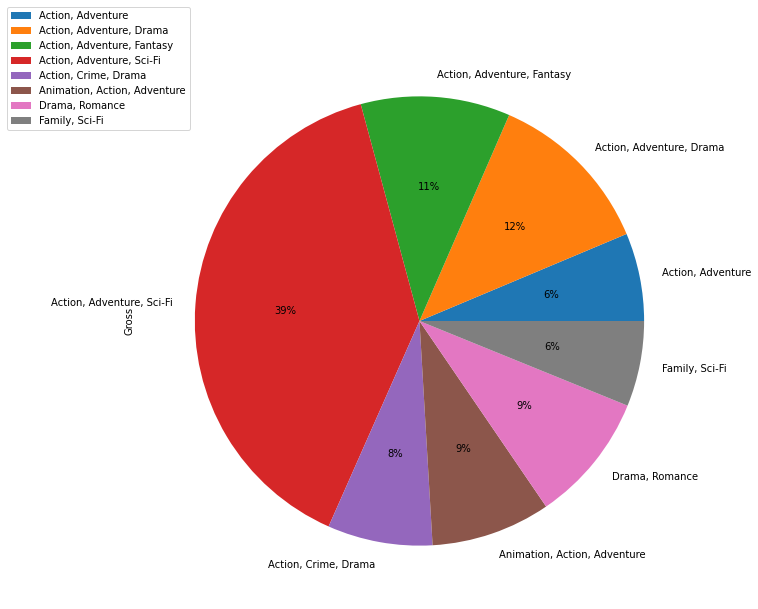

In [254]:
#explode = (0.01,0.01,0.1,0.01,0.1,0.01, 0.01, 0.1)
highest_gross.groupby(['Genre']).sum().plot(
    kind='pie', y='Gross', autopct='%1.0f%%', shadow=False, figsize=(20, 10))
plt.legend( bbox_to_anchor=(0.100,0.95), loc="center right")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.50)

# ***7. Scatter plots of Gross with respect to IMDB Rating and No of Votes.***

It can be seen from the plots that gross of the movies are close to each other with respect to the IMDB Ratings and No of Votes. There are few movies which have done exceptionally good in terms of gross. 




---



---



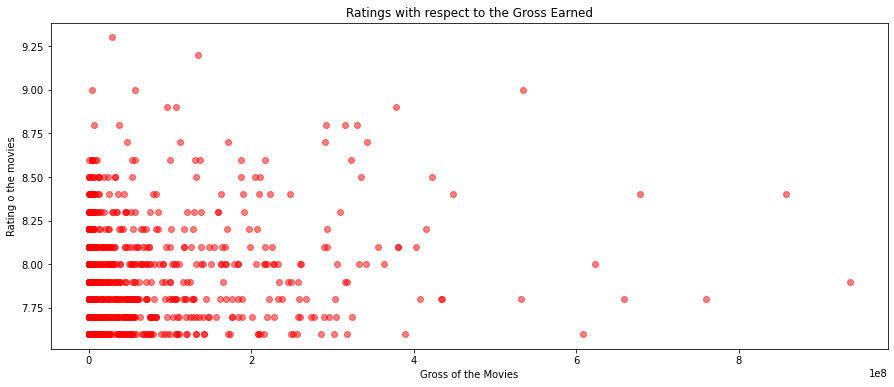

In [255]:
plt.figure(figsize=(15,6))
plt.scatter(x= imdb_df['Gross'], y=imdb_df['IMDB_Rating'], alpha=0.5, color='red')
plt.xlabel('Gross of the Movies')
plt.ylabel('Rating o the movies')
plt.title('Ratings with respect to the Gross Earned')
plt.show()

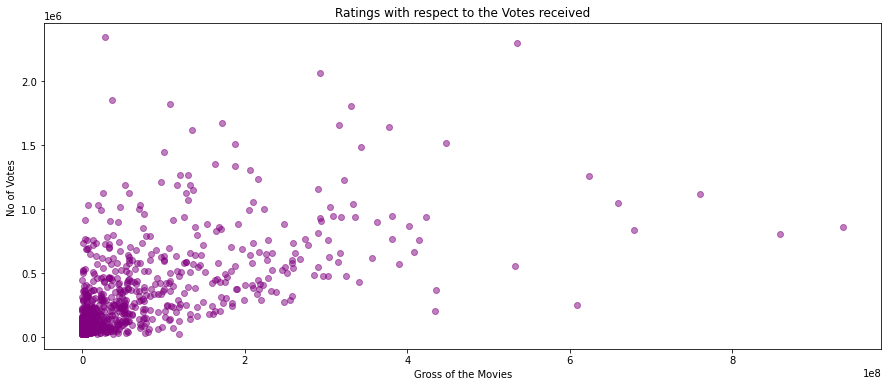

In [256]:
plt.figure(figsize=(15,6))
plt.scatter(x= imdb_df['Gross'], y=imdb_df['No_of_Votes'], alpha=0.5, color='purple')
plt.xlabel('Gross of the Movies')
plt.ylabel('No of Votes ')
plt.title('Ratings with respect to the Votes received')
plt.show()

# ***8. Directos of top gross generating Movies***


As we can see from the below table, Directors like **'George Lucas', 'Lana Wachowski' and 'Frank Darabont'** have given movies with highest earing gross. The ratings of the movies directed by these directs are not among the top rated movies, but the gross earned is more than those movies.





---



---



In [257]:
director_series=imdb_df.groupby('Director')['IMDB_Rating','No_of_Votes','Gross','Meta_score'].mean()
min_imdb_score=8.5
top_director = director_series[director_series['IMDB_Rating']>min_imdb_score]
top_director = top_director.sort_values('Gross', ascending=False)

<ipython-input-257-bba95a5d23be>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  director_series=imdb_df.groupby('Director')['IMDB_Rating','No_of_Votes','Gross','Meta_score'].mean()


In [258]:
top_director

,IMDB_Rating,No_of_Votes,Gross,Meta_score
Director,,,,
George Lucas,8.60,1231473.0,322740140.0,90.0
Irvin Kershner,8.70,1159315.0,290475067.0,82.0
Lana Wachowski,8.70,1676426.0,171479930.0,73.0
Frank Darabont,8.95,1745452.0,82571421.5,70.5
Roberto Benigni,8.60,623629.0,57598247.0,59.0
Fernando Meirelles,8.60,699256.0,7563397.0,79.0
Masaki Kobayashi,8.60,42004.0,4360000.0,85.0
Sudha Kongara,8.60,54995.0,4360000.0,76.0
Thomas Kail,8.60,55291.0,4360000.0,90.0


# ***8. Top rated actors and their gross ***

In this part, I will be exploring the pair of actors who have generated highest gross for the movies. This will give the idea about which actor pairs are the best to earn profit from movies. 





---



---



---



In [259]:
actorseries=imdb_df.groupby(['Star1','Star2','Star3', 'Star4'])['IMDB_Rating','No_of_Votes','Gross','Meta_score'].mean()
top_actors = actorseries[actorseries['IMDB_Rating']>min_imdb_score]
top_actors = top_actors.sort_values('Gross', ascending=False)
top_actors

<ipython-input-259-63ae38d94b17>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actorseries=imdb_df.groupby(['Star1','Star2','Star3', 'Star4'])['IMDB_Rating','No_of_Votes','Gross','Meta_score'].mean()


IMDB_Rating  \
Star1               Star2                 Star3              Star4                                 
Christian Bale      Heath Ledger          Aaron Eckhart      Michael Caine                   9.0   
Elijah Wood         Viggo Mortensen       Ian McKellen       Orlando Bloom                   8.9   
                    Ian McKellen          Viggo Mortensen    Orlando Bloom                   8.7   
Tom Hanks           Robin Wright          Gary Sinise        Sally Field                     8.8   
Mark Hamill         Harrison Ford         Carrie Fisher      Alec Guinness                   8.6   
Elijah Wood         Ian McKellen          Orlando Bloom      Sean Bean                       8.8   
Leonardo DiCaprio   Joseph Gordon-Levitt  Elliot Page        Ken Watanabe                    8.8   
Tom Hanks           Matt Damon            Tom Sizemore       Edward Burns                    8.6   
Matthew McConaughey Anne Hathaway         Jessica Chastain   Mackenzie Foy                   8.6   
Lilly Wachowski     Keanu Reeves          Laurence Fishburne Carrie-Anne Moss                8.7   
Tom Hanks           Michael Clarke Duncan David Morse        Bonnie Hunt                     8.6   
Marlon Brando       Al Pacino             James Caan         Diane Keaton                    9.2   
Jodie Foster        Anthony Hopkins       Lawrence A. Bonney Kasi Lemmons                    8.6   
Jack Nicholson      Louise Fletcher       Michael Berryman   Peter Brocco                    8.7   
John Travolta       Uma Thurman           Samuel L. Jackson  Bruce Willis                    8.9   
Morgan Freeman      Brad Pitt             Kevin Spacey       Andrew Kevin Walker             8.6   
Liam Neeson         Ralph Fiennes         Ben Kingsley       Caroline Goodall                8.9   
Roberto Benigni     Nicoletta Braschi     Giorgio Cantarini  Giustino Durano                 8.6   
Al Pacino           Robert De Niro        Robert Duvall      Diane Keaton                    9.0   
Kang-ho Song        Lee Sun-kyun          Cho Yeo-jeong      Choi Woo-sik                    8.6   
Robert De Niro      Ray Liotta            Joe Pesci          Lorraine Bracco                 8.7   
Brad Pitt           Edward Norton         Meat Loaf          Zach Grenier                    8.8   
Tim Robbins         Morgan Freeman        Bob Gunton         William Sadler                  9.3   
Daveigh Chase       Suzanne Pleshette     Miyu Irino         Rumi Hiiragi                    8.6   
Kátia Lund          Alexandre Rodrigues   Leandro Firmino    Matheus Nachtergaele            8.6   
Clint Eastwood      Eli Wallach           Lee Van Cleef      Aldo Giuffrè                    8.8   
Lin-Manuel Miranda  Phillipa Soo          Leslie Odom Jr.    Renée Elise Goldsberry          8.6   
James Stewart       Donna Reed            Lionel Barrymore   Thomas Mitchell                 8.6   
Suriya              Madhavan              Paresh Rawal       Aparna Balamurali               8.6   
Tatsuya Nakadai     Akira Ishihama        Shima Iwashita     Tetsurô Tanba                   8.6   
Henry Fonda         Lee J. Cobb           Martin Balsam      John Fiedler                    9.0   
Toshirô Mifune      Takashi Shimura       Keiko Tsushima     Yukiko Shimazaki                8.6   

                                                                                     No_of_Votes  \
Star1               Star2                 Star3              Star4                                 
Christian Bale      Heath Ledger          Aaron Eckhart      Michael Caine             2303232.0   
Elijah Wood         Viggo Mortensen       Ian McKellen       Orlando Bloom             1642758.0   
                    Ian McKellen          Viggo Mortensen    Orlando Bloom             1485555.0   
Tom Hanks           Robin Wright          Gary Sinise        Sally Field               1809221.0   
Mark Hamill         Harrison Ford         Carrie Fisher      Alec Guinness          



---


# ***9. Trend Analysis of the Genre for each Decade***

In this part I am doing a trend analysis of the most famous genre of the movies in each decade starting from 1920 to 2020. This will give a picture of how with each passing decade, the prefreneces of the audiences changed, and now which genre of the movie is the most trending. 


For performing the trend analysis, I have created a new Dataframe for each decade, which includes the top movies which have gross gretaer than the mean gross of that decade. Next I wil, be combining the gross generated by these movies together and their common genre. I will repeat the same process from all the decade(1920- 2020: 10 decades). For every decade we will have a single entry with genre , decade and the gross earned toghter. 

The result of each decade is stored in a new DataFrame "topGen_df" which has 10 entries from each genre.




---



---



In [260]:
min_imdb_score = 7.6
GenreYear=imdb_df.groupby(['Genre', 'Released_Year'], as_index=False)['IMDB_Rating','Gross'].mean()
Genre_check = GenreYear[GenreYear['IMDB_Rating']>min_imdb_score]
Genre_check = Genre_check.sort_values('Released_Year', ascending=True)
Genre_check['Released_Year'] = Genre_check['Released_Year'].str.replace(',', '').astype(int)
Genre_check

<ipython-input-260-86de2f85c60b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  GenreYear=imdb_df.groupby(['Genre', 'Released_Year'], as_index=False)['IMDB_Rating','Gross'].mean()


,Genre,Released_Year,IMDB_Rating,Gross
840,"Fantasy, Horror, Mystery",1920,8.1,4360000.0
436,"Comedy, Drama, Family",1921,8.3,5450000.0
839,"Fantasy, Horror",1922,7.9,4360000.0
83,"Action, Comedy, Romance",1924,8.2,977375.0
688,"Drama, History, Thriller",1925,8.0,50970.0
...,...,...,...,...
354,"Biography, Drama, History",2020,8.6,4360000.0
651,Drama,2020,8.6,4360000.0
474,"Comedy, Drama, Romance",2020,7.9,4360000.0
435,"Comedy, Drama",2020,7.8,4360000.0


In [261]:
minYear = Genre_check['Released_Year'].min()
maxYear = minYear + 10

In [262]:
min = minYear
max = min + 10
dec_df = pd.DataFrame()
for i in range(len(Genre_check)):
  decade1 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade1 = decade1.sort_values('Gross', ascending=False)
decade1= decade1[:5]
dec_df = dec_df.append(decade1, ignore_index=True)



In [263]:
decade1

,Genre,Released_Year,IMDB_Rating,Gross
436,"Comedy, Drama, Family",1921,8.3,5450000.0
163,"Adventure, Comedy, Drama",1925,8.2,5450000.0
840,"Fantasy, Horror, Mystery",1920,8.1,4360000.0
839,"Fantasy, Horror",1922,7.9,4360000.0
499,"Comedy, Romance",1928,8.1,4360000.0


In [264]:
decade1 = decade1[decade1['Gross']>decade1['Gross'].median()]
genreList = decade1['Genre']
d1 = list(genreList)
a0 = d1[0].split(",")
a1=d1[1].split(",")
topGen1 = a0 + a1
topGen1 = [x.strip() for x in topGen1]
topGen1= [x.replace(",", "") for x in topGen1]
alist = list((set(topGen1)))
topGen_df = pd.DataFrame({"Decade": "1920 - 1930", "Gross": decade1['Gross'].sum(), "Genre":[alist]})
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"


# DECADE 2

In [265]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade2 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade2 = decade2.sort_values('Gross', ascending=False)
decade2= decade2[:5]
dec_df = dec_df.append(decade2, ignore_index=True)

In [266]:
decade2

,Genre,Released_Year,IMDB_Rating,Gross
686,"Drama, History, Romance",1939,8.10,198676459.0
290,"Animation, Family, Fantasy",1940,7.70,76408097.0
220,"Adventure, Horror, Sci-Fi",1933,7.90,10000000.0
411,"Comedy, Drama",1939,8.05,6980000.0
703,"Drama, Horror, Sci-Fi",1935,7.80,4360000.0


In [267]:
decade2 = decade2[decade2['Gross']>decade2['Gross'].median()]
genreList2 = decade2['Genre']
d2 = list(genreList2)
a0 = d2[0].split(",")
a1=d2[1].split(",")
topGen2 = a0 + a1
topGen2 = [x.strip() for x in topGen2]
topGen2= [x.replace(",", "") for x in topGen2]
alist2 = list((set(topGen2)))
topGen_df = topGen_df.append({"Decade": "1930 - 1940", "Gross": decade2['Gross'].sum(), "Genre":[alist2]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."


#DECADE 3

In [268]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade3 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade3 = decade3.sort_values('Gross', ascending=False)
decade3= decade3[:5]
dec_df = dec_df.append(decade3, ignore_index=True)
decade3

,Genre,Released_Year,IMDB_Rating,Gross
290,"Animation, Family, Fantasy",1940,7.7,76408097.0
783,"Drama, Romance, War",1946,8.0,23650000.0
720,"Drama, Music, Romance",1948,8.1,10900000.0
674,"Drama, Film-Noir",1945,7.9,9460000.0
680,"Drama, Film-Noir, Romance",1946,7.8,7412000.0


In [269]:
decade3 = decade3[decade3['Gross']>decade3['Gross'].median()]
genreList3 = decade3['Genre']
d3 = list(genreList3)
dec3 = d3[0].split(",")
dec31=d3[1].split(",")
topGen3 = dec3 + dec31
topGen3 = [x.strip() for x in topGen3]
topGen3= [x.replace(",", "") for x in topGen3]
alist3 = list((set(topGen3)))
topGen_df = topGen_df.append({"Decade": "1940 - 1950", "Gross": decade3['Gross'].sum(), "Genre":[alist3]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."


# DECADE 4

In [270]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade4 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade4 = decade4.sort_values('Gross', ascending=False)
decade4= decade4[:5]
dec_df = dec_df.append(decade4, ignore_index=True)
decade4

,Genre,Released_Year,IMDB_Rating,Gross
180,"Adventure, Drama",1956,7.9,93740000.0
190,"Adventure, Drama, History",1959,8.1,74700000.0
204,"Adventure, Drama, War",1957,8.1,44908000.0
859,"Mystery, Thriller",1954,8.4,36764313.0
847,"Horror, Mystery, Thriller",1960,8.5,32000000.0


In [271]:
decade4 = decade4[decade4['Gross']>decade4['Gross'].median()]
genreList4 = decade4['Genre']
d4 = list(genreList4)
dec4 = d4[0].split(",")
dec41=d4[1].split(",")
topGen4 = dec4 + dec41
topGen4 = [x.strip() for x in topGen4]
topGen4= [x.replace(",", "") for x in topGen4]
alist4 = list((set(topGen4)))
topGen_df = topGen_df.append({"Decade": "1950 - 1960", "Gross": decade4['Gross'].sum(), "Genre":[alist4]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,168440000.0,"[[Adventure, History, Drama]]"


# DECADE 5

In [272]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade5 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade5 = decade5.sort_values('Gross', ascending=False)
decade5= decade5[:5]
dec_df = dec_df.append(decade5, ignore_index=True)
decade5

,Genre,Released_Year,IMDB_Rating,Gross
328,"Biography, Drama, Family",1965,8.0,163214286.0
785,"Drama, Romance, War",1965,8.0,111722000.0
457,"Comedy, Drama, Romance",1967,8.0,104945305.0
302,"Biography, Crime, Drama",1969,8.0,102308889.0
485,"Comedy, Family, Fantasy",1964,7.8,102272727.0


In [273]:
decade5 = decade5[decade5['Gross']>decade5['Gross'].median()]
genreList5 = decade5['Genre']
d5 = list(genreList5)
dec5 = d5[0].split(",")
dec51=d5[1].split(",")
topGen5 = dec5 + dec51
topGen5 = [x.strip() for x in topGen5]
topGen5= [x.replace(",", "") for x in topGen5]
alist5 = list((set(topGen5)))
topGen_df = topGen_df.append({"Decade": "1960 - 1970", "Gross": decade5['Gross'].sum(), "Genre":[alist5]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,168440000.0,"[[Adventure, History, Drama]]"
4,1960 - 1970,274936286.0,"[[Biography, Romance, Family, Drama, War]]"


# DECADE 6

In [274]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade6 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade6 = decade6.sort_values('Gross', ascending=False)
decade6= decade6[:5]
dec_df = dec_df.append(decade6, ignore_index=True)
decade6

,Genre,Released_Year,IMDB_Rating,Gross
27,"Action, Adventure, Fantasy",1977,8.6,322740140.0
28,"Action, Adventure, Fantasy",1980,8.7,290475067.0
223,"Adventure, Thriller",1975,8.0,260000000.0
845,Horror,1973,8.0,232906145.0
514,"Crime, Drama",1972,9.2,134966411.0


In [275]:
decade6 = decade6[decade6['Gross']>decade6['Gross'].median()]
genreList6 = decade6['Genre']
d6 = list(genreList6)
dec6 = d6[0].split(",")
dec61=d6[1].split(",")
topGen6 = dec6 + dec61
topGen6 = [x.strip() for x in topGen6]
topGen6= [x.replace(",", "") for x in topGen6]
alist6 = list((set(topGen6)))
topGen_df = topGen_df.append({"Decade": "1970 - 1980", "Gross": decade6['Gross'].sum(), "Genre":[alist6]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,168440000.0,"[[Adventure, History, Drama]]"
4,1960 - 1970,274936286.0,"[[Biography, Romance, Family, Drama, War]]"
5,1970 - 1980,613215207.0,"[[Adventure, Action, Fantasy]]"


# DECADE 7

In [276]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade7 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade7 = decade7.sort_values('Gross', ascending=False)
decade7= decade7[:5]
dec_df = dec_df.append(decade7, ignore_index=True)
decade7

,Genre,Released_Year,IMDB_Rating,Gross
838,"Family, Sci-Fi",1982,7.8,435110554.0
29,"Action, Adventure, Fantasy",1983,8.3,309125409.0
28,"Action, Adventure, Fantasy",1980,8.7,290475067.0
0,"Action, Adventure",1981,8.4,248159971.0
79,"Action, Comedy, Fantasy",1984,7.8,238632124.0


In [277]:
decade7 = decade7[decade7['Gross']>decade7['Gross'].median()]
genreList7 = decade7['Genre']
d7 = list(genreList7)
dec7 = d7[0].split(",")
dec71=d7[1].split(",")
topGen7 = dec7 + dec71
topGen7 = [x.strip() for x in topGen7]
topGen7= [x.replace(",", "") for x in topGen7]
alist7 = list((set(topGen7)))


In [278]:
topGen_df = topGen_df.append({"Decade": "1980 - 1990", "Gross": decade7['Gross'].sum(), "Genre":[alist7]},  ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,168440000.0,"[[Adventure, History, Drama]]"
4,1960 - 1970,274936286.0,"[[Biography, Romance, Family, Drama, War]]"
5,1970 - 1980,613215207.0,"[[Adventure, Action, Fantasy]]"
6,1980 - 1990,744235963.0,"[[Adventure, Action, Family, Sci-Fi, Fantasy]]"


# DECADE 8

In [279]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade8 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade8 = decade8.sort_values('Gross', ascending=False)
decade8= decade8[:5]
dec_df = dec_df.append(decade8, ignore_index=True)
decade8

,Genre,Released_Year,IMDB_Rating,Gross
258,"Animation, Adventure, Drama",1994,8.50,422783777.0
41,"Action, Adventure, Sci-Fi",1993,8.10,402453882.0
765,"Drama, Romance",1997,8.05,398879407.0
763,"Drama, Romance",1994,8.80,330252182.0
746,"Drama, Mystery, Thriller",1999,8.10,293506292.0


In [280]:
decade8 = decade8[decade8['Gross']>decade8['Gross'].median()]
genreList8 = decade8['Genre']
d8 = list(genreList8)
dec8 = d8[0].split(",")
dec81=d8[1].split(",")
topGen8 = dec8 + dec81
topGen8 = [x.strip() for x in topGen8]
topGen8= [x.replace(",", "") for x in topGen8]
alist8 = list((set(topGen8)))
topGen_df = topGen_df.append({"Decade": "1990 - 2000", "Gross": decade8['Gross'].sum(), "Genre":[alist8]}, ignore_index= True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,10900000.0,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,275084556.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,100058097.0,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,168440000.0,"[[Adventure, History, Drama]]"
4,1960 - 1970,274936286.0,"[[Biography, Romance, Family, Drama, War]]"
5,1970 - 1980,613215207.0,"[[Adventure, Action, Fantasy]]"
6,1980 - 1990,744235963.0,"[[Adventure, Action, Family, Sci-Fi, Fantasy]]"
7,1990 - 2000,825237659.0,"[[Adventure, Animation, Action, Sci-Fi, Drama]]"


# DECADE 9

In [281]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade9 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade9 = decade9.sort_values('Gross', ascending=False)
decade9= decade9[:5]
dec_df = dec_df.append(decade9, ignore_index=True)
decade9

,Genre,Released_Year,IMDB_Rating,Gross
32,"Action, Adventure, Fantasy",2009,7.80,760507625.0
21,"Action, Adventure, Drama",2003,8.90,377845905.0
44,"Action, Adventure, Sci-Fi",2008,7.90,318412101.0
19,"Action, Adventure, Drama",2001,8.80,315544750.0
248,"Animation, Adventure, Comedy",2010,7.95,307913408.0


In [282]:
decade9 = decade9[decade9['Gross']>decade9['Gross'].median()]
genreList9 = decade9['Genre']
d9 = list(genreList9)
dec9 = d9[0].split(",")
dec91=d9[1].split(",")
topGen9 = dec9 + dec91
topGen9 = [x.strip() for x in topGen9]
topGen9= [x.replace(",", "") for x in topGen9]
alist9 = list((set(topGen9)))
topGen_df = topGen_df.append({"Decade": "2000 - 2010", "Gross": decade9['Gross'].sum(), "Genre":[alist9]}, ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,1.090000e+07,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,2.750846e+08,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,1.000581e+08,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,1.684400e+08,"[[Adventure, History, Drama]]"
4,1960 - 1970,2.749363e+08,"[[Biography, Romance, Family, Drama, War]]"
5,1970 - 1980,6.132152e+08,"[[Adventure, Action, Fantasy]]"
6,1980 - 1990,7.442360e+08,"[[Adventure, Action, Family, Sci-Fi, Fantasy]]"
7,1990 - 2000,8.252377e+08,"[[Adventure, Animation, Action, Sci-Fi, Drama]]"
8,2000 - 2010,1.138354e+09,"[[Adventure, Drama, Action, Fantasy]]"


#DECADE 10

In [283]:
min = min + 10
max = max + 10
for i in range(len(Genre_check)):
  decade10 = Genre_check.loc[(Genre_check['Released_Year'] >= min) & (Genre_check['Released_Year'] <= max)]
  decade10 = decade10.sort_values('Gross', ascending=False)
decade10= decade10[:5]
dec_df = dec_df.append(decade10, ignore_index=True)
decade10

,Genre,Released_Year,IMDB_Rating,Gross
25,"Action, Adventure, Drama",2019,8.4,858373000.0
53,"Action, Adventure, Sci-Fi",2018,8.4,678815482.0
48,"Action, Adventure, Sci-Fi",2012,8.0,623279547.0
51,"Action, Adventure, Sci-Fi",2015,8.0,545360282.5
52,"Action, Adventure, Sci-Fi",2016,7.8,470130836.5


In [284]:
decade10 = decade10[decade10['Gross']>decade10['Gross'].median()]
genreList10 = decade10['Genre']
d10 = list(genreList10)
dec10 = d10[0].split(",")
dec101=d10[1].split(",")
topGen10 = dec10 + dec101
topGen10 = [x.strip() for x in topGen10]
topGen10= [x.replace(",", "") for x in topGen10]
alist10 = list((set(topGen10)))
topGen_df = topGen_df.append({"Decade": "2010 - 2020", "Gross": decade10['Gross'].sum(), "Genre":[alist10]},ignore_index=True)
topGen_df

,Decade,Gross,Genre
0,1920 - 1930,1.090000e+07,"[Comedy, Adventure, Family, Drama]"
1,1930 - 1940,2.750846e+08,"[[Animation, Romance, Family, Fantasy, Drama, ..."
2,1940 - 1950,1.000581e+08,"[[Animation, Romance, Family, Fantasy, Drama, ..."
3,1950 - 1960,1.684400e+08,"[[Adventure, History, Drama]]"
4,1960 - 1970,2.749363e+08,"[[Biography, Romance, Family, Drama, War]]"
5,1970 - 1980,6.132152e+08,"[[Adventure, Action, Fantasy]]"
6,1980 - 1990,7.442360e+08,"[[Adventure, Action, Family, Sci-Fi, Fantasy]]"
7,1990 - 2000,8.252377e+08,"[[Adventure, Animation, Action, Sci-Fi, Drama]]"
8,2000 - 2010,1.138354e+09,"[[Adventure, Drama, Action, Fantasy]]"
9,2010 - 2020,1.537188e+09,"[[Adventure, Sci-Fi, Action, Drama]]"


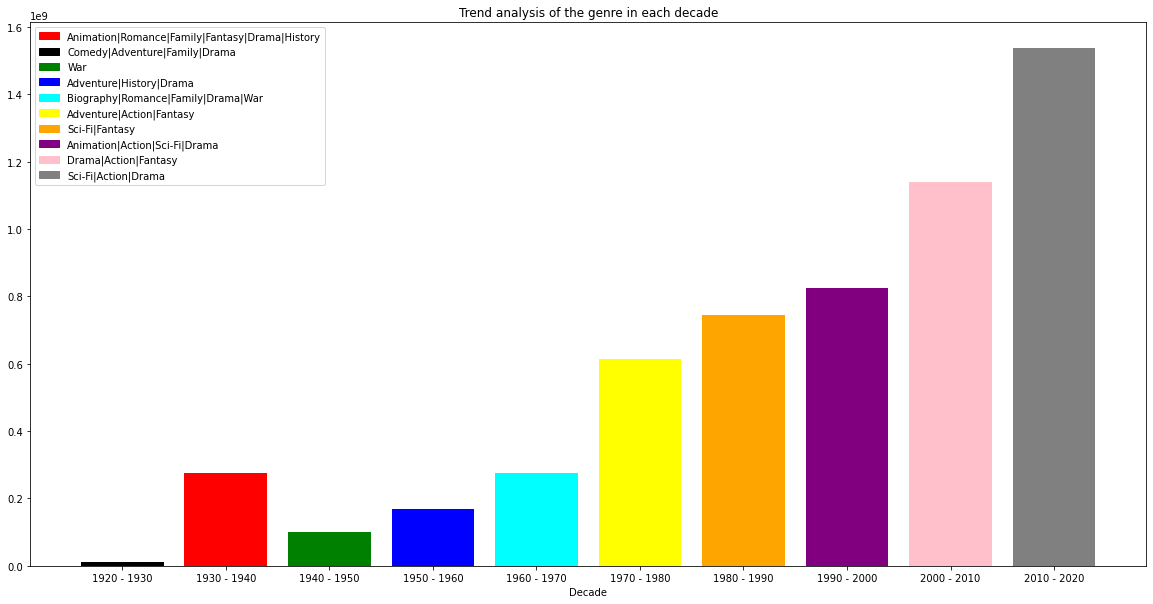

In [285]:
#topGen_df.groupby(['Decade']).sum().plot(
   # kind='bar', y='Gross', figsize=(20, 10), cmap='Dark2')
import matplotlib.patches as mpatches
plt.figure(figsize=(20,10))
plt.bar(topGen_df['Decade'], topGen_df['Gross'], data=topGen_df['Genre'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange','purple', 'pink', 'grey'])
black_patch = mpatches.Patch(color='black', label='Comedy|Adventure|Family|Drama')
red_patch = mpatches.Patch(color='red', label='Animation|Romance|Family|Fantasy|Drama|History')
green_patch = mpatches.Patch(color='green', label = 'War')
blue_patch = mpatches.Patch(color='blue', label ='Adventure|History|Drama')
cyan_patch = mpatches.Patch(color='cyan', label ='Biography|Romance|Family|Drama|War')
yellow_patch = mpatches.Patch(color='yellow', label ='Adventure|Action|Fantasy')
orange_patch = mpatches.Patch(color='orange',label ='Sci-Fi|Fantasy')
purple_patch = mpatches.Patch(color = 'purple', label='Animation|Action|Sci-Fi|Drama')
pink_patch = mpatches.Patch(color='pink', label ='Drama|Action|Fantasy')
grey_patch = mpatches.Patch(color='grey', label = 'Sci-Fi|Action|Drama')

plt.legend(handles=[red_patch, black_patch, green_patch, blue_patch, cyan_patch, yellow_patch, orange_patch, purple_patch, pink_patch, grey_patch])
plt.xlabel('Decade')
plt.title('Trend analysis of the genre in each decade')
#plt.legend()
plt.show()

From the above bar chart, it can be seen that the genre of the movies gradually changed with each passing decade.For exmaple in the decade of 1960-1970 movies with genre Romance, Family and drama earned the meximum gross but in the next decade i.e. 1970-1980 movies with genre Adventure, Action and Fantasy were trending. THe tred for the movies with genre Sci-Fi started in the year 1990 and now it is the most famous and highest grossearing genre. 

# ***10. Recommendation for the Movie***


1. The movie should be made in Genre **'SciFi|Action|Drama|**


---



---


2. The movie should be **Directed by** one or the combination of the below directos

        George Lucas
        Irvin Kershner	
        Lana Wachowski	
        Frank Darabont	
        Roberto Benigni




---

3. **The Combination of actors in the Movie can be as follows:**

 Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine	

 Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom

 Ian McKellen, Viggo Mortensen, Orlando Bloom	

 Tom Hanks, Robin Wright, Gary Sinise, Sally Field	

 Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, 	Ken Watanabe	

 Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy	



---

4. The avergae run time of the movie can be between **120-140 **mins


---



---





